## Unsupervised Learning: K-Means Clustering (BaskinRobbins dataset)
* Baskin Robbins nutritional information from http://www.baskinrobbins.ca/nutritional-information/

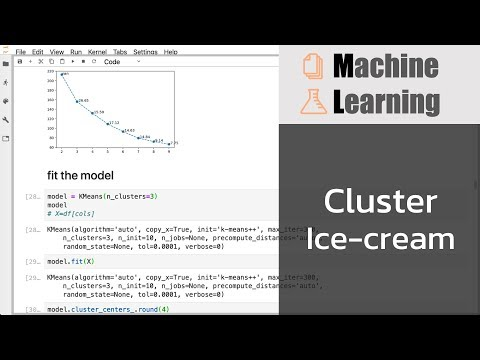

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('2xEPsZAxIGs', width=720, height=405)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.3.4
numpy   version = 1.20.3
seaborn version = 0.11.2


In [3]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.tsv', sep='\t')
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
30,Lunar Cheesecake,180,11.0,0.4,18,13,3.0,NaN
32,Mango Mania,130,6.0,0.2,17,14,2.0,NaN
15,Chocolate Hazelnut Truffle,280,17.0,0.4,29,20,5.0,NaN
24,German Chocolate Cake,190,10.0,0.2,21,16,4.0,NaN
35,Maple Walnut,260,17.0,0.4,22,17,5.0,NaN
29,Love Potion #31,260,14.0,0.4,29,24,4.0,NaN
37,Mint Chocolate Chip,240,15.0,0.5,23,18,5.0,NaN
46,Pink Bubble Gum,150,7.0,0.3,20,17,3.0,NaN
8,NSA Caramel Turtle Truffle,200,8.0,0.2,38,7,5.0,24.0
25,Gold Medal Ribbon,240,12.0,0.4,30,23,4.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Sugar Alcohol (g)  3 non-null      float64
dtypes: float64(4), int64(3), object(1)
memory usage: 4.5+ KB


In [5]:
df.drop(columns=['Sugar Alcohol (g)'], inplace=True)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0


In [6]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [7]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

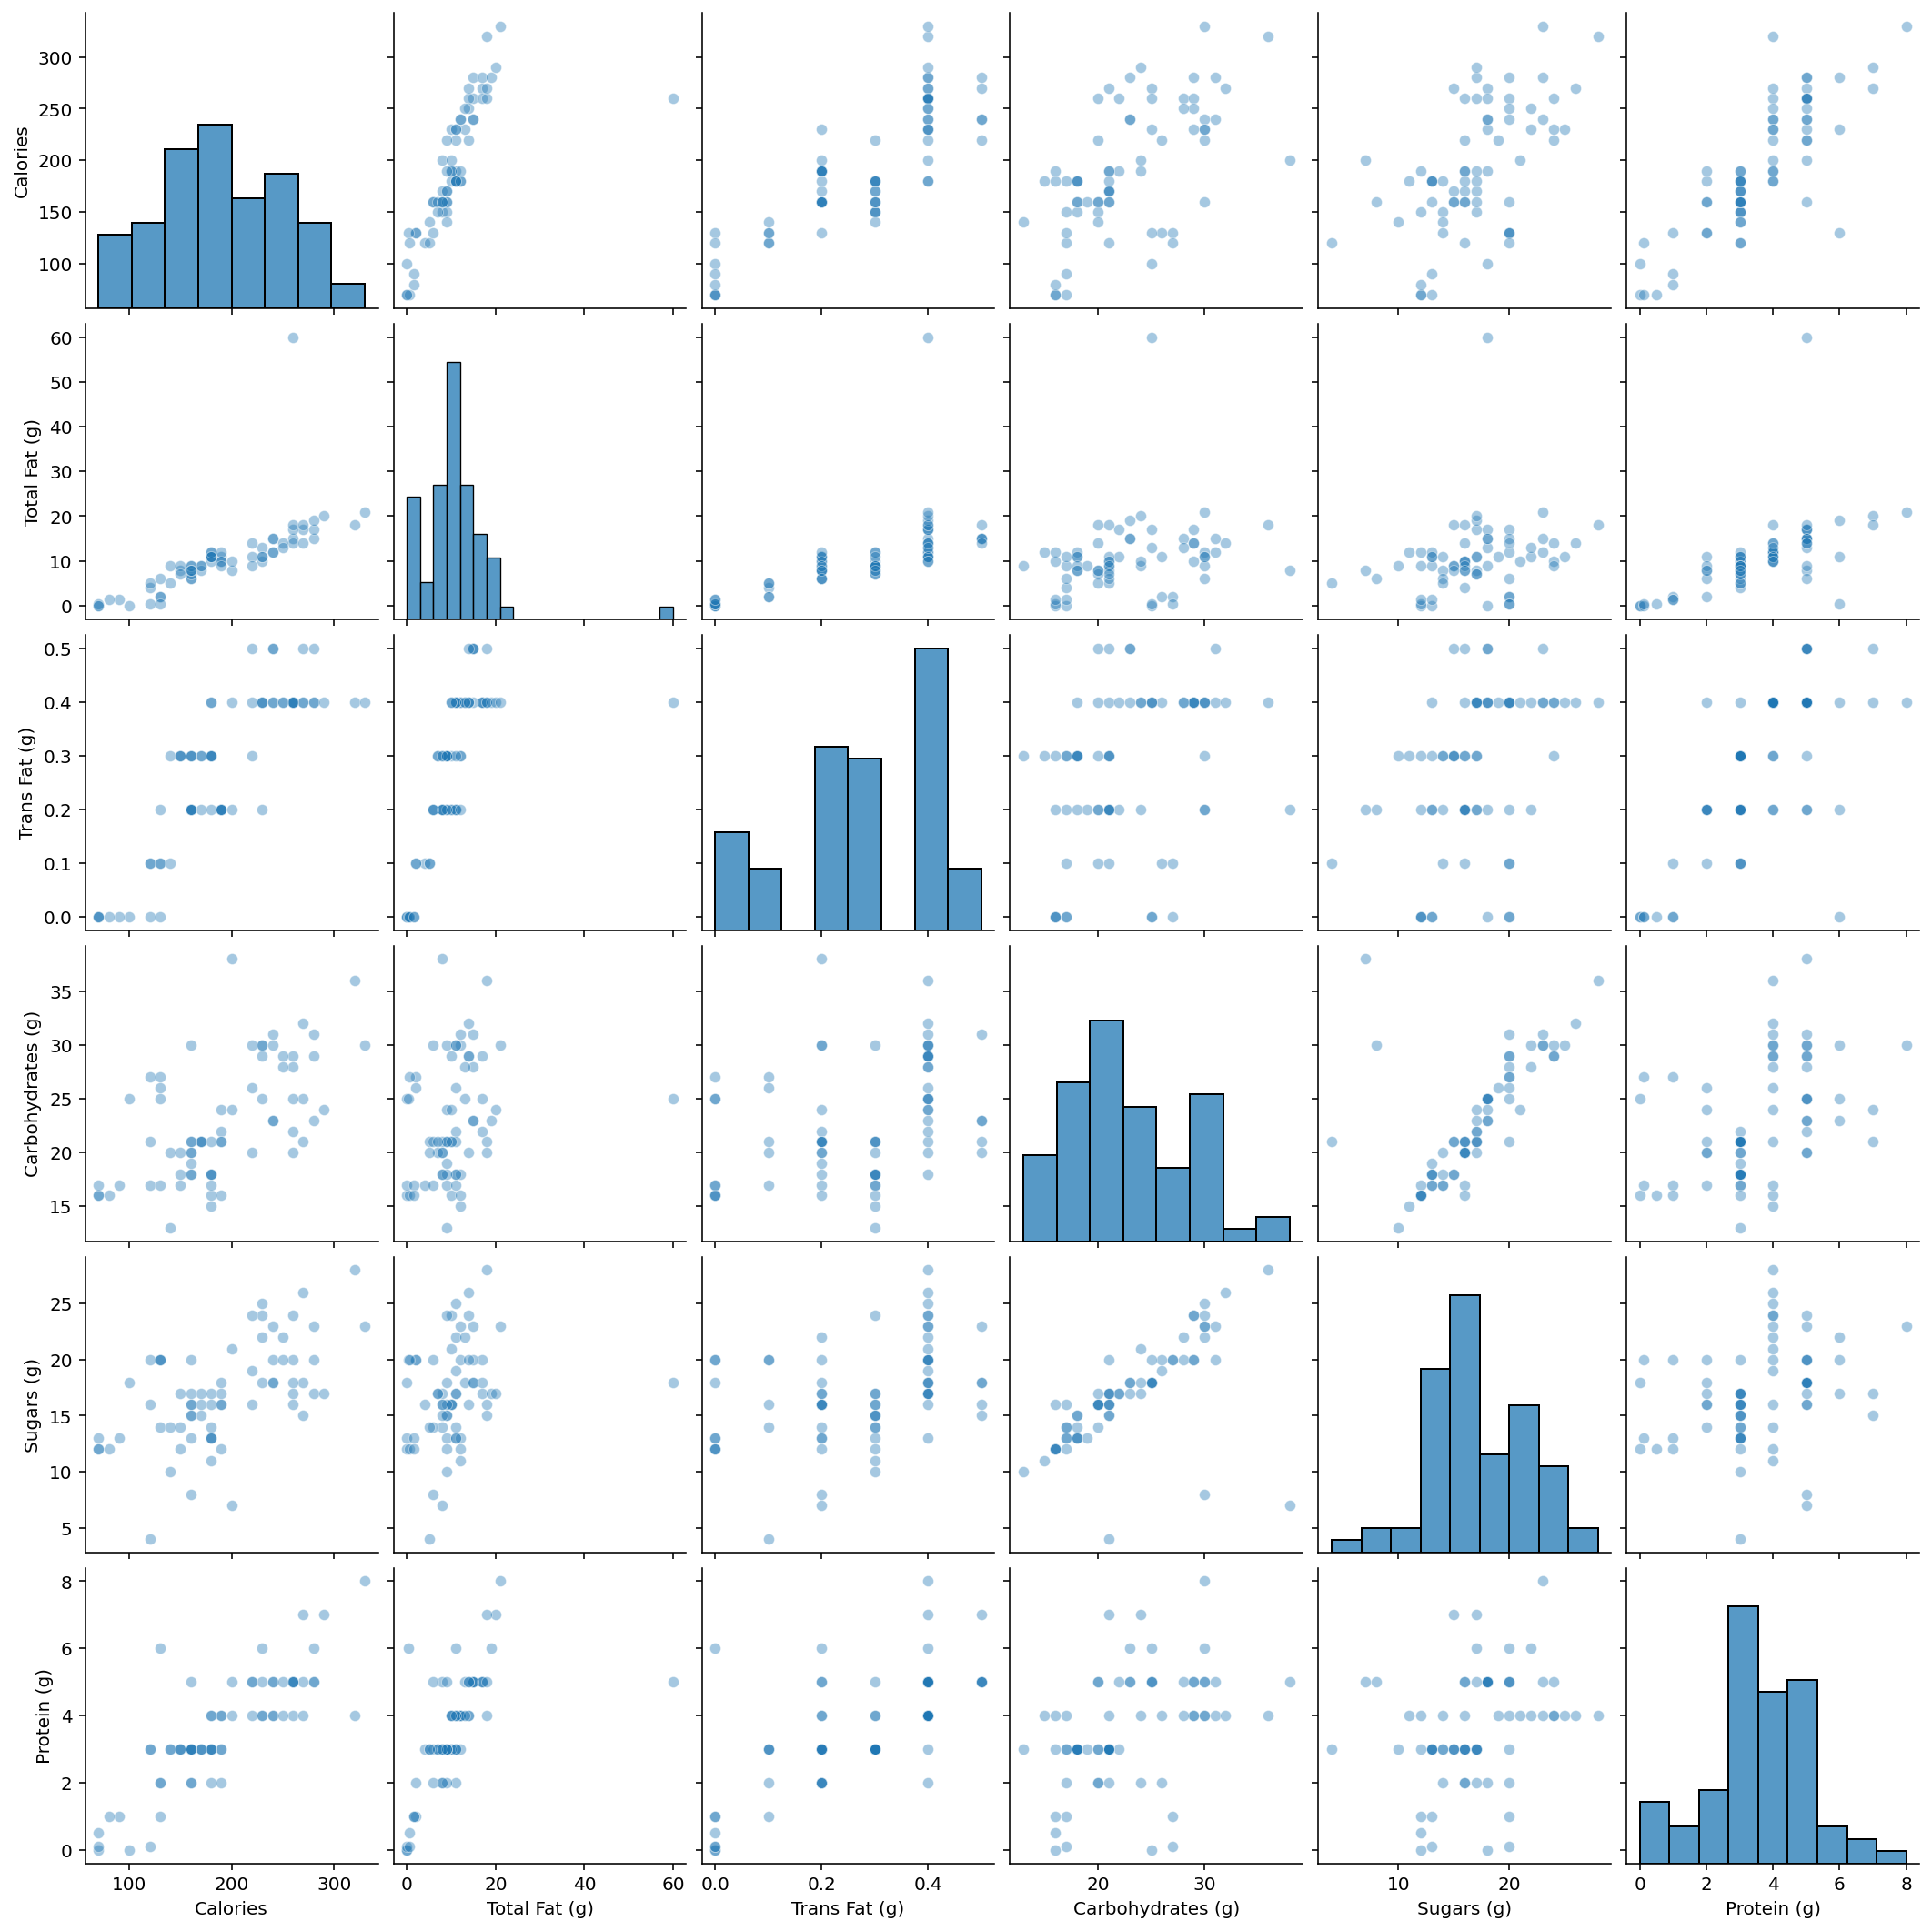

In [8]:
sns.pairplot(df, vars=cols, 
             plot_kws={'alpha': .4});

# Scikit-learn: KMeans Clustering

In [9]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [10]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [11]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
## z-score
scaler = preprocessing.StandardScaler() # create StandardScaler instance
z=scaler.fit_transform(df[cols]) # calc z-score
z[:5].round(4) # 2D numpy array

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])

In [12]:
## Yeo-Johnson transformation (preferable)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) # support only positive value
mat = pt.fit_transform(df[cols])
mat[:5].round(4)

array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

In [13]:
bc_cols = [f'bc_{c}' for c in cols]
bc_cols

['bc_Calories',
 'bc_Total Fat (g)',
 'bc_Trans Fat (g)',
 'bc_Carbohydrates (g)',
 'bc_Sugars (g)',
 'bc_Protein (g)']

In [14]:
z_cols = [f'z_{c}' for c in cols]
z_cols

['z_Calories',
 'z_Total Fat (g)',
 'z_Trans Fat (g)',
 'z_Carbohydrates (g)',
 'z_Sugars (g)',
 'z_Protein (g)']

In [15]:
ds=pd.concat([df, pd.DataFrame(mat, columns=bc_cols), pd.DataFrame(z, columns=z_cols)], axis='columns')
ds.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),bc_Calories,bc_Total Fat (g),bc_Trans Fat (g),bc_Carbohydrates (g),bc_Sugars (g),bc_Protein (g),z_Calories,z_Total Fat (g),z_Trans Fat (g),z_Carbohydrates (g),z_Sugars (g),z_Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,-0.518194,-0.324811,-0.533530,-0.535844,-0.204771,-0.94002
1,Baseball Nut,160,9.0,0.2,19,13,3.0,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,-0.518194,-0.198073,-0.533530,-0.720618,-0.876675,-0.34019
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,-0.354799,-0.198073,0.158083,-0.351070,-0.428739,-0.34019
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,-1.171772,-0.831762,-1.225143,-1.090165,-0.204771,-0.34019
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,-1.008377,-1.085238,-1.225143,0.572799,0.691102,-0.94002


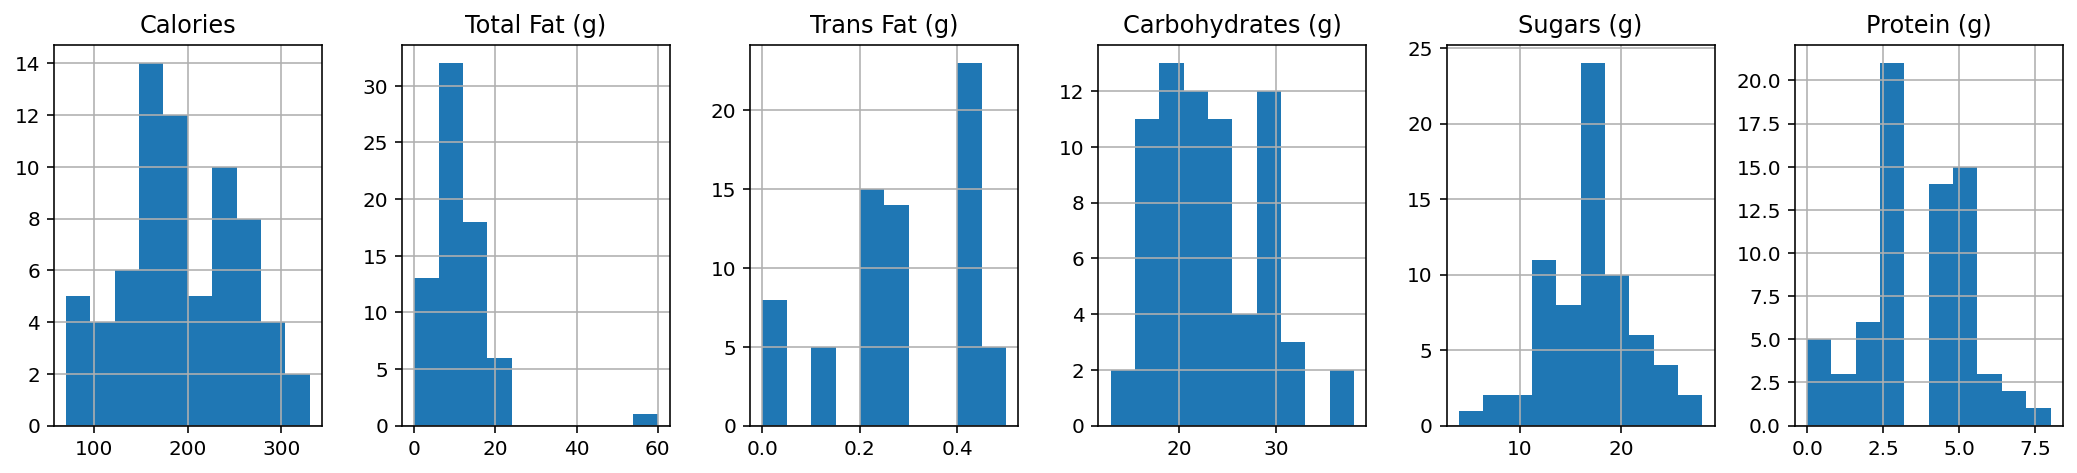

In [16]:
ds[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));

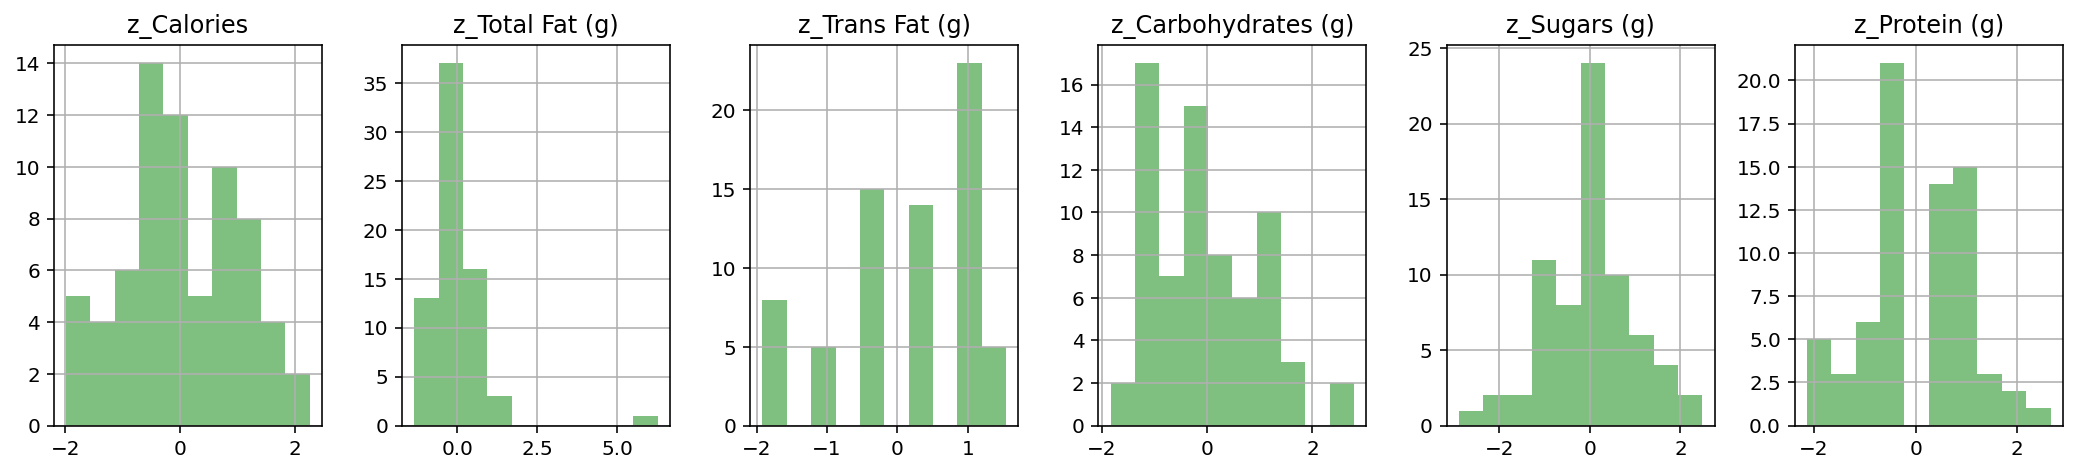

In [17]:
ds[z_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='green', alpha=.5);

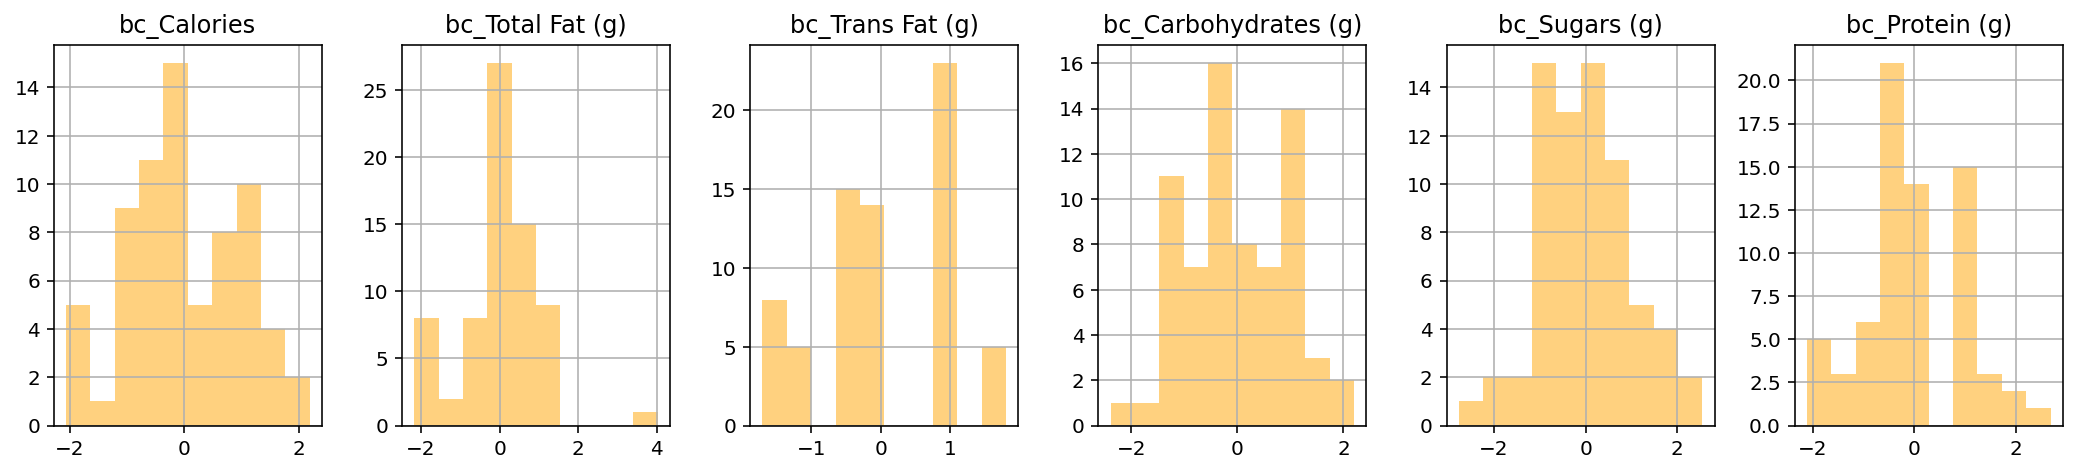

In [18]:
ds[bc_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange', alpha=.5);

In [19]:
X=pd.DataFrame(mat, columns=cols) ## power transformation (preferable)
# X=pd.DataFrame(z, columns=cols) ## z-score
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181


---

## scatter matrix with transformed data

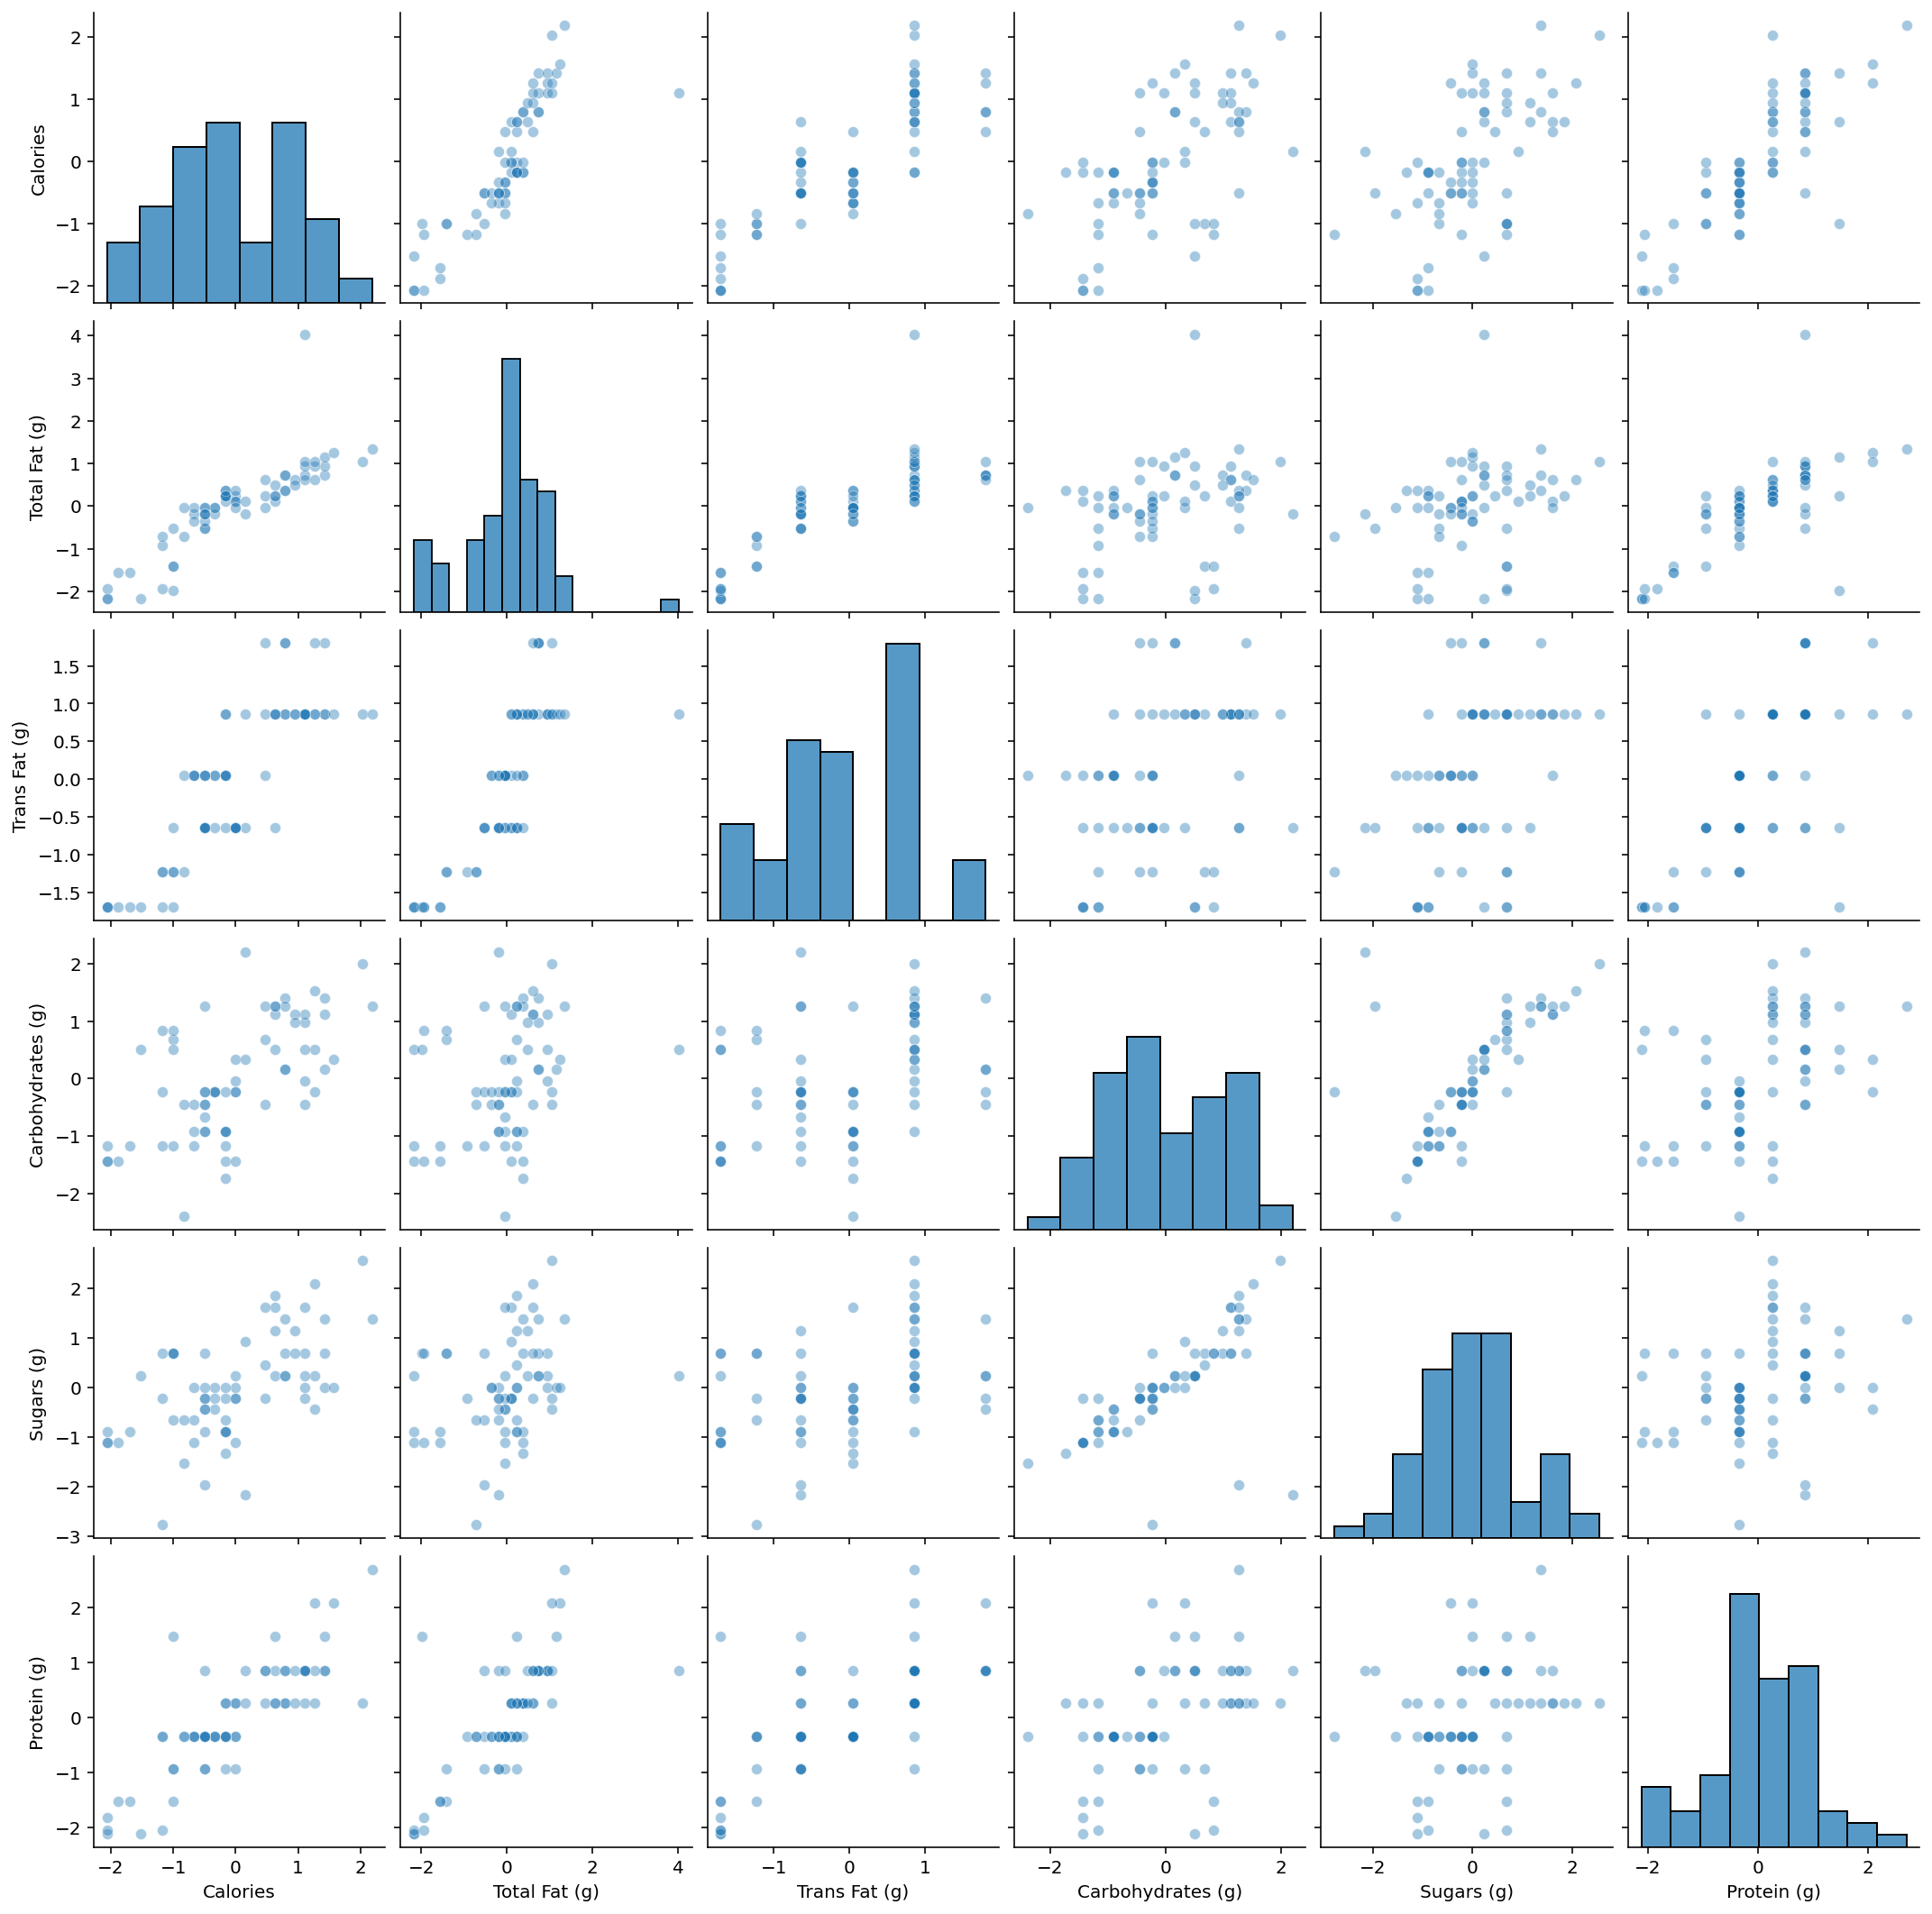

In [20]:
sns.pairplot(X, 
             plot_kws={'alpha': .4});

# Scikit-learn: KMeans Clustering

In [21]:
from sklearn.cluster import KMeans

## Optimal number of clusters

In [22]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

[[2, 212.64279113095125],
 [3, 155.993731513363],
 [4, 131.65474381217098],
 [5, 109.36406208600857],
 [6, 93.24001850114766],
 [7, 82.57653646214602],
 [8, 70.78131558577313],
 [9, 65.18986905552183]]

In [23]:
xy=np.array(ssd)
print(xy)

[[  2.         212.64279113]
 [  3.         155.99373151]
 [  4.         131.65474381]
 [  5.         109.36406209]
 [  6.          93.2400185 ]
 [  7.          82.57653646]
 [  8.          70.78131559]
 [  9.          65.18986906]]


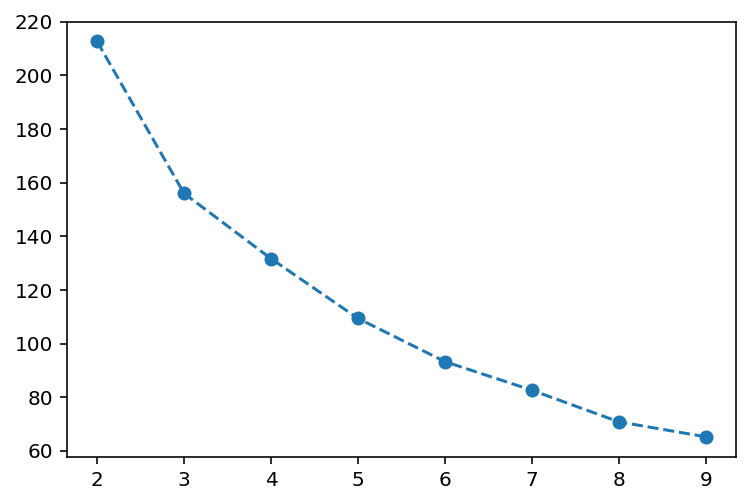

In [24]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [25]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,212.642791
1,3,155.993732
2,4,131.654744
3,5,109.364062
4,6,93.240019
5,7,82.576536
6,8,70.781316
7,9,65.189869


In [26]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,212.642791,NaN
1,3,155.993732,-26.640480
2,4,131.654744,-15.602542
3,5,109.364062,-16.931165
4,6,93.240019,-14.743457
5,7,82.576536,-11.436594
6,8,70.781316,-14.283986
7,9,65.189869,-7.899608


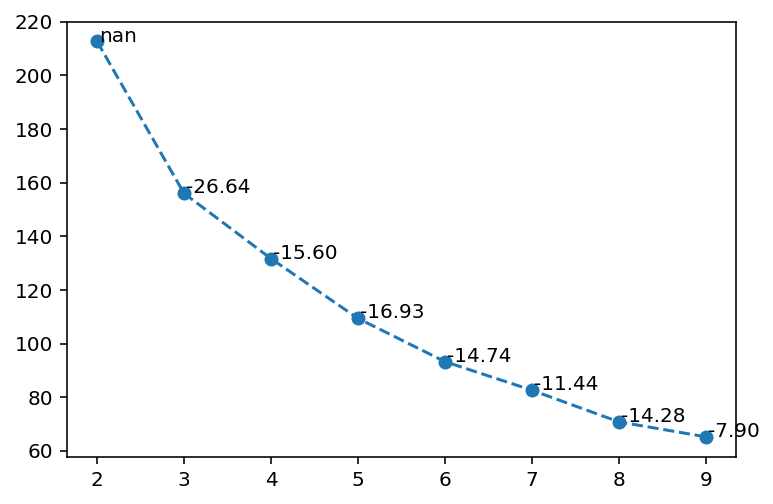

In [27]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

## fit the model

In [28]:
model = KMeans(n_clusters=3)
model
# X=df[cols]

KMeans(n_clusters=3)

In [29]:
model.fit(X)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
model.cluster_centers_.round(4)

array([[-1.5485, -1.8342, -1.605 , -0.33  , -0.2096, -1.425 ],
       [ 1.0208,  0.7778,  0.9435,  0.7589,  0.7909,  0.8394],
       [-0.4093, -0.1074, -0.324 , -0.5609, -0.6265, -0.2892]])

In [31]:
model.transform(X) # the distance between each point and centroid

array([[2.22891027, 3.38003665, 0.8510254 ],
       [2.64161598, 3.42920514, 0.44375572],
       [2.94049125, 2.68797166, 0.53899753],
       [1.72730412, 4.30496741, 1.60971142],
       [1.63009151, 4.09969758, 2.55945588],
       [2.81242916, 3.3020949 , 0.58112177],
       [3.04371205, 5.17795727, 2.54226966],
       [2.51295897, 2.88230237, 0.78971948],
       [4.68815556, 3.87618946, 3.42776273],
       [4.3289111 , 1.02624737, 2.3012883 ],
       [2.98306453, 2.55318582, 1.03172164],
       [4.7301037 , 0.78263417, 2.45952729],
       [5.41386831, 1.21127176, 3.03860246],
       [6.1398813 , 1.28332786, 4.21012426],
       [3.06312134, 3.60787468, 0.89644415],
       [5.54534523, 0.58293092, 3.4259425 ],
       [3.0134846 , 3.35078705, 0.68732081],
       [1.22435935, 5.5930566 , 3.55237834],
       [2.86837044, 2.72866365, 0.76427502],
       [5.27575522, 0.68691377, 2.91712779],
       [4.79693473, 0.99156408, 2.98638999],
       [3.54314424, 2.54910642, 1.58347506],
       [3.

In [32]:
model.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1,
       0, 0, 2, 1])

## sense making about each cluster

In [33]:
df['cluster']=model.labels_
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,2
1,Baseball Nut,160,9.0,0.2,19,13,3.0,2
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,2
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,2
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0


In [34]:
df.groupby('cluster').describe().T

cluster                           0           1           2
Calories          count   10.000000   28.000000   32.000000
                  mean    99.000000  254.642857  165.625000
                  std     26.436507   29.749839   20.781117
                  min     70.000000  200.000000  120.000000
                  25%     72.500000  230.000000  157.500000
                  50%     95.000000  255.000000  165.000000
                  75%    127.500000  270.000000  180.000000
                  max    130.000000  330.000000  200.000000
Total Fat (g)     count   10.000000   28.000000   32.000000
                  mean     0.840000   16.178571    8.687500
                  std      0.823542    9.161326    2.161802
                  min      0.000000    9.000000    4.000000
                  25%      0.100000   12.000000    7.750000
                  50%      0.500000   14.500000    9.000000
                  75%      1.500000   17.250000   10.250000
                  max      2.000000   60.000000   12.000000
Trans Fat (g)     count   10.000000   28.000000   32.000000
                  mean     0.020000    0.407143    0.243750
                  std      0.042164    0.060422    0.075935
                  min      0.000000    0.200000    0.100000
                  25%      0.000000    0.400000    0.200000
                  50%      0.000000    0.400000    0.200000
                  75%      0.000000    0.400000    0.300000
                  max      0.100000    0.500000    0.400000
Carbohydrates (g) count   10.000000   28.000000   32.000000
                  mean    21.200000   26.892857   19.937500
                  std      5.116422    4.030801    4.471685
                  min     16.000000   20.000000   13.000000
                  25%     16.250000   23.750000   17.750000
                  50%     21.000000   28.000000   20.000000
                  75%     25.750000   30.000000   21.000000
                  max     27.000000   36.000000   38.000000
Sugars (g)        count   10.000000   28.000000   32.000000
                  mean    16.000000   20.428571   14.125000
                  std      3.858612    3.382182    3.357707
                  min     12.000000   15.000000    4.000000
                  25%     12.250000   18.000000   13.000000
                  50%     15.500000   20.000000   15.000000
                  75%     20.000000   23.000000   16.000000
                  max     20.000000   28.000000   20.000000
Protein (g)       count   10.000000   28.000000   32.000000
                  mean     1.170000    4.964286    3.093750
                  std      1.812947    1.035737    0.734380
                  min      0.000000    4.000000    2.000000
                  25%      0.100000    4.000000    3.000000
                  50%      0.750000    5.000000    3.000000
                  75%      1.000000    5.000000    3.000000
                  max      6.000000    8.000000    5.000000

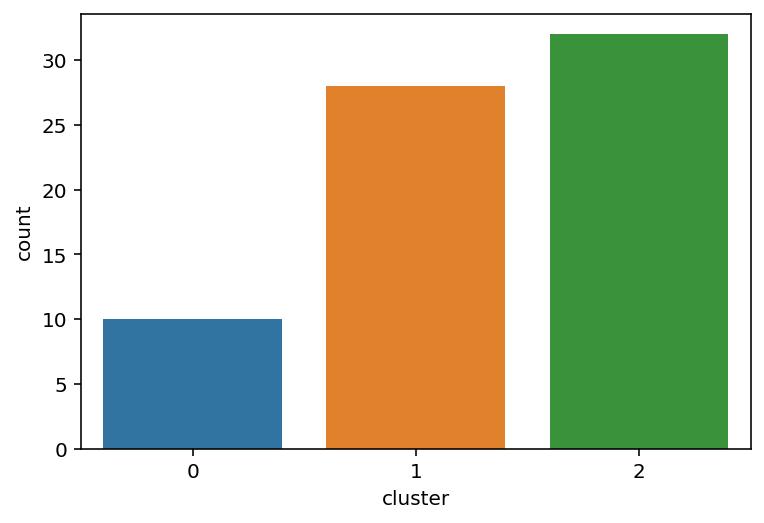

In [35]:
sns.countplot(x='cluster', data=df);

In [36]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

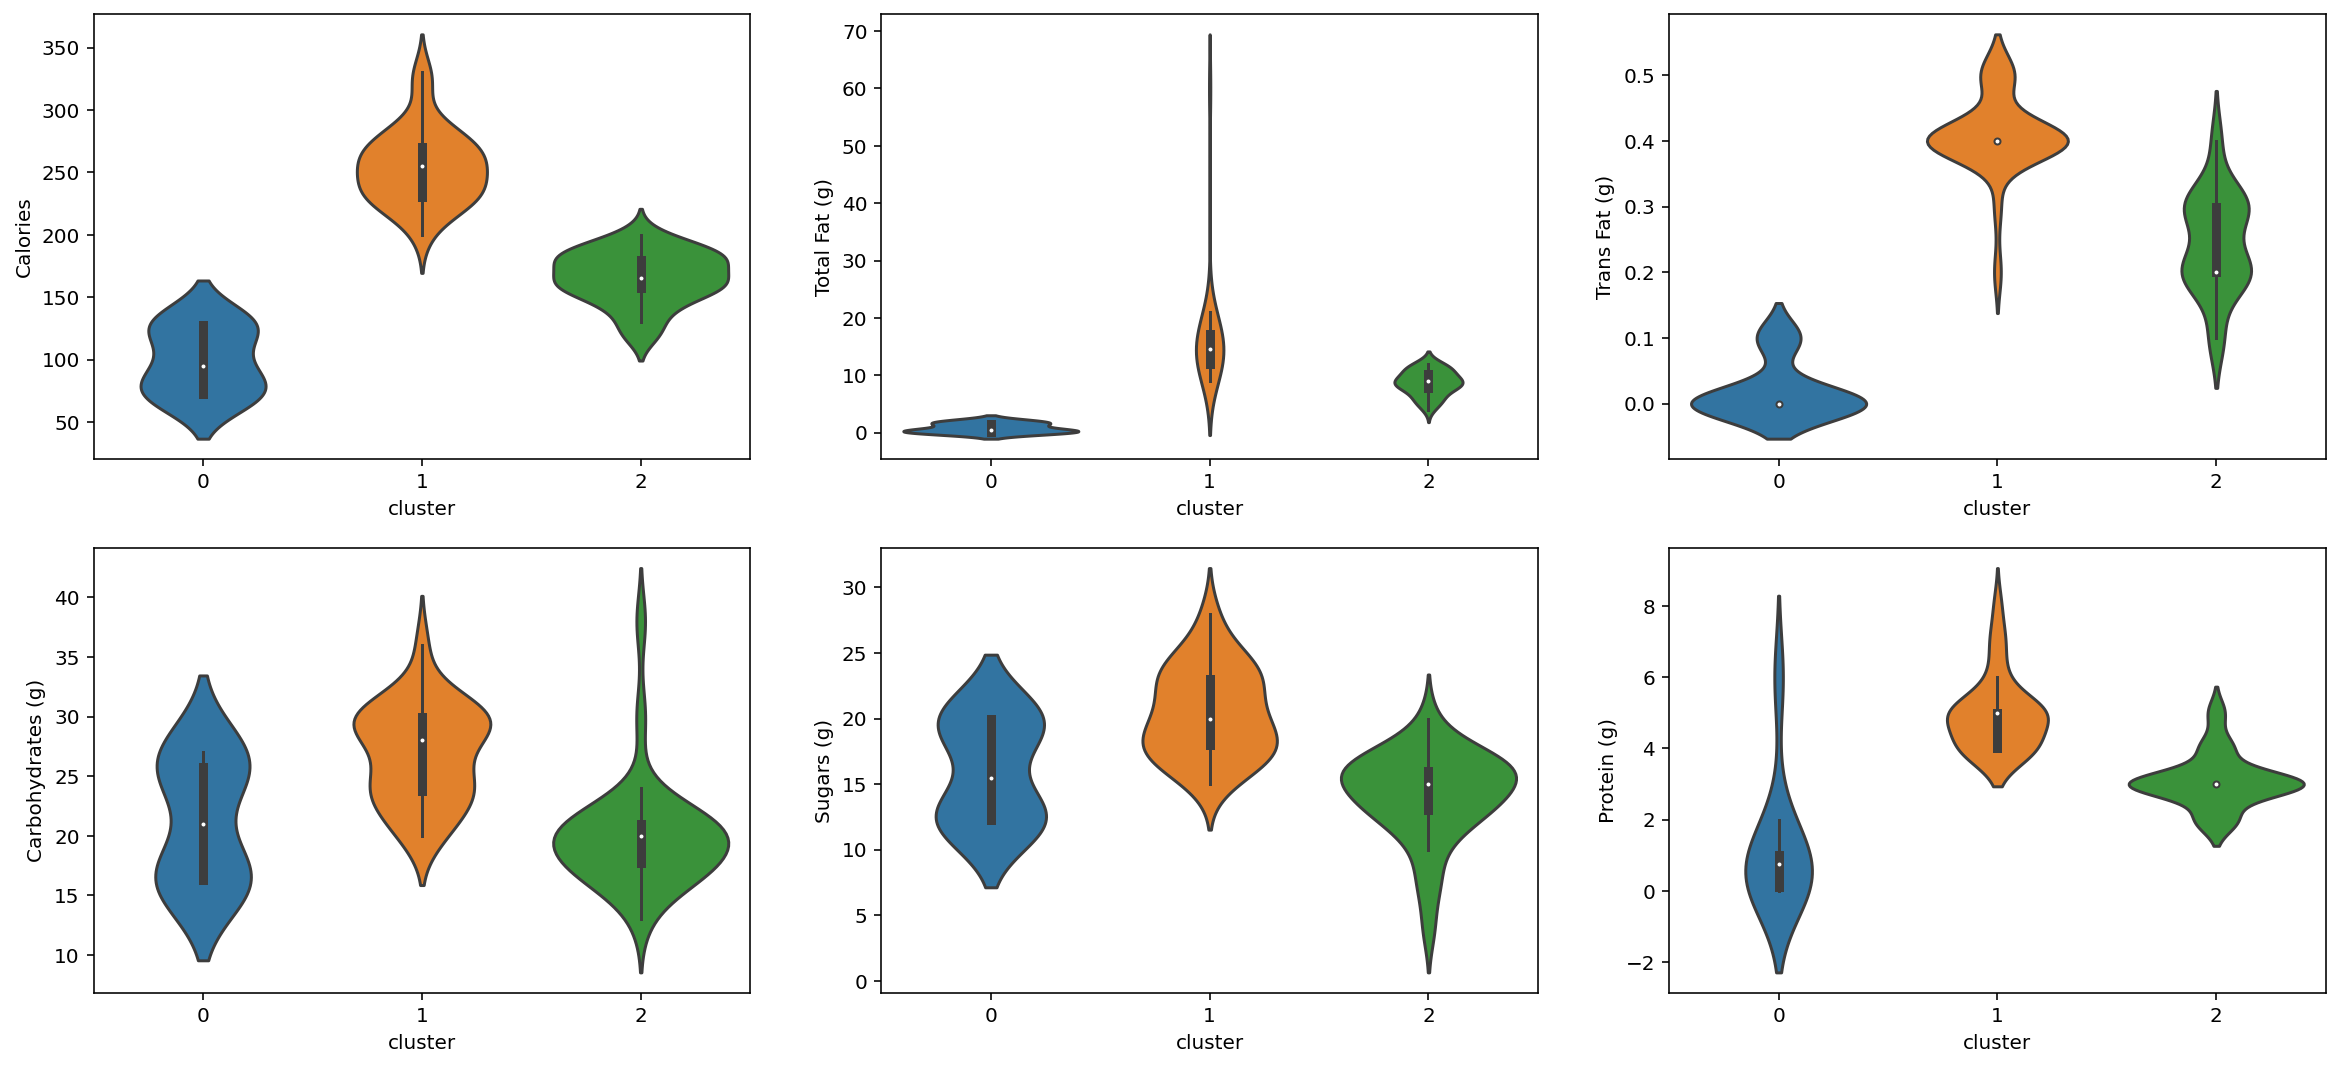

In [37]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])

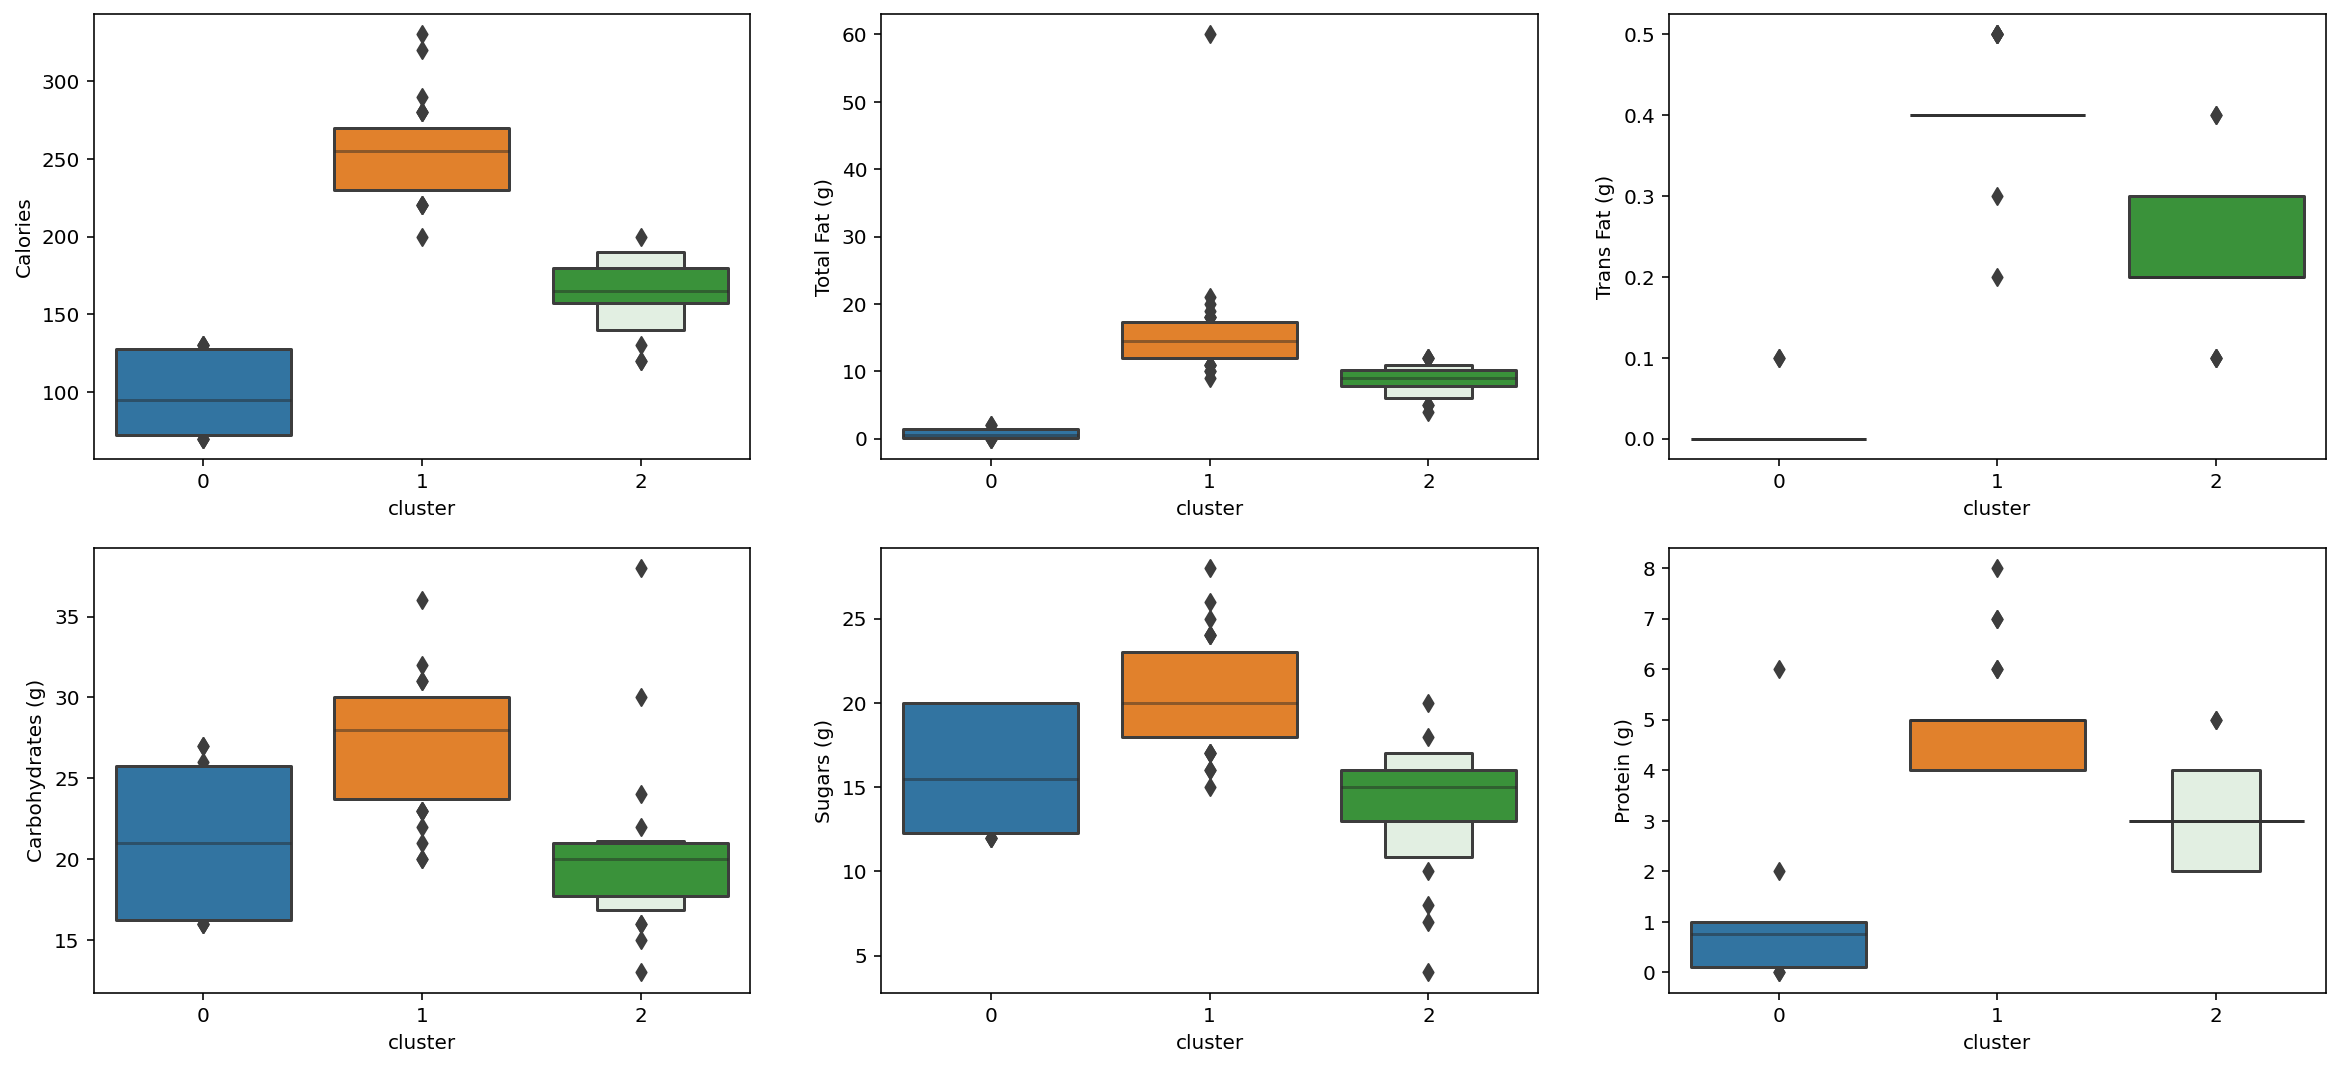

In [38]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.boxenplot(x='cluster', y=col, data=df, ax=ax[i])

### raw data (no scaling)

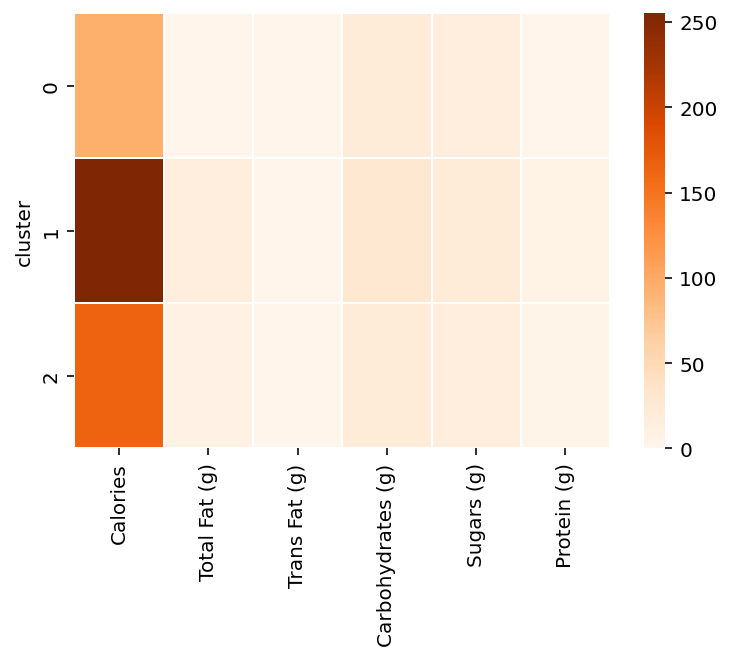

In [39]:
sns.heatmap(df.groupby('cluster').median(), cmap='Oranges', linewidths=1);

In [40]:
dx=X
dx['cluster']=model.labels_
dx.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,2
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,2
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,2
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,2
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,0


### scaled data (either z-score, power transform)

In [41]:
dx.groupby('cluster').median()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
cluster,,,,,,
0,-1.612508,-1.935544,-1.700508,-0.328836,-0.326237,-1.680032
1,1.029516,0.671798,0.857656,0.980131,0.686477,0.859598
2,-0.417082,-0.039724,-0.643961,-0.447402,-0.442092,-0.346462


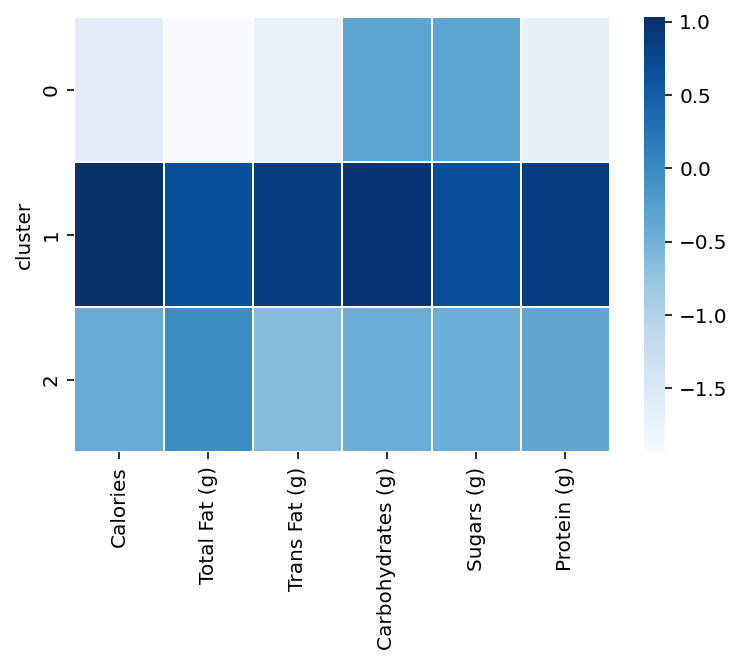

In [42]:
sns.heatmap(dx.groupby('cluster').median(), cmap="Blues", linewidths=1);

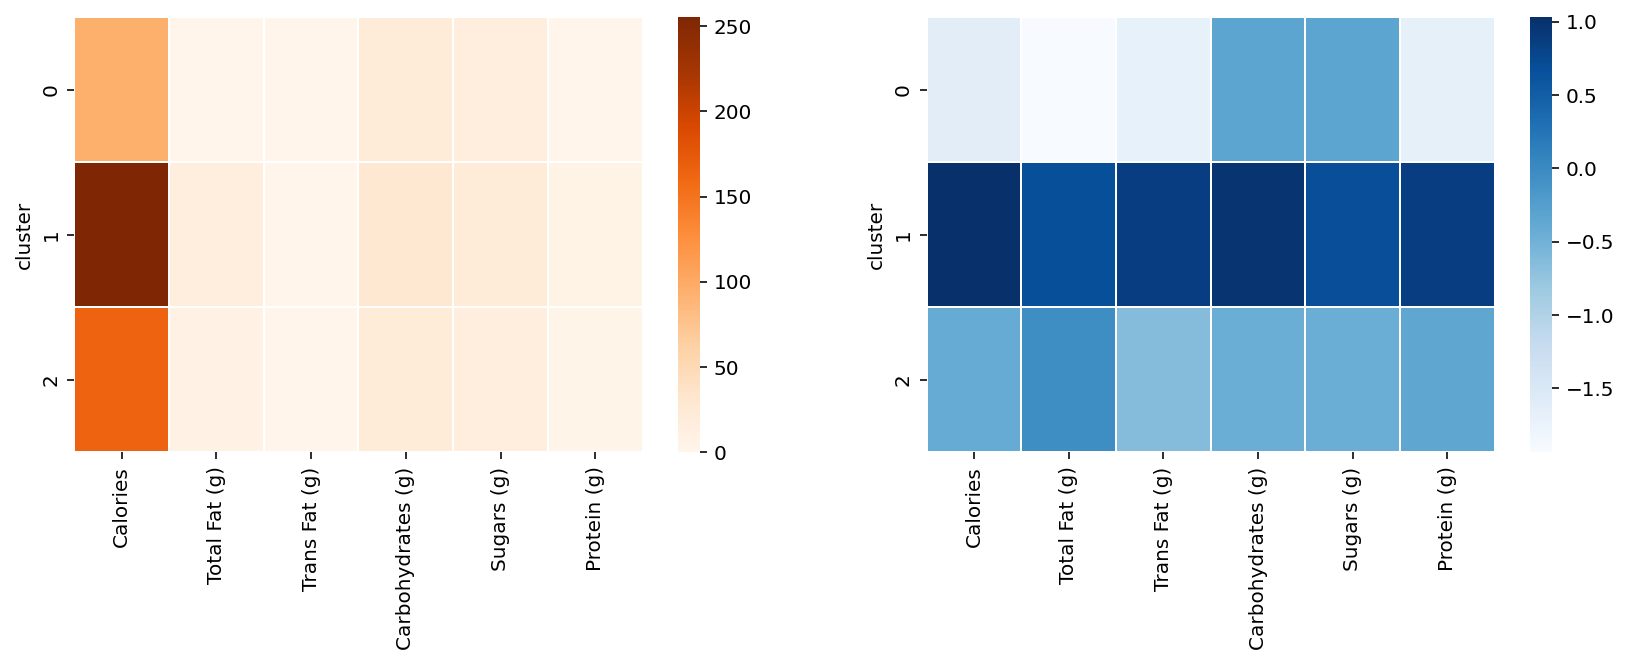

In [43]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax=ax.ravel()
sns.heatmap(df.groupby('cluster').median(), cmap="Oranges", linewidths=1, ax=ax[0]);
sns.heatmap(dx.groupby('cluster').median(), cmap="Blues", linewidths=1, ax=ax[1]);

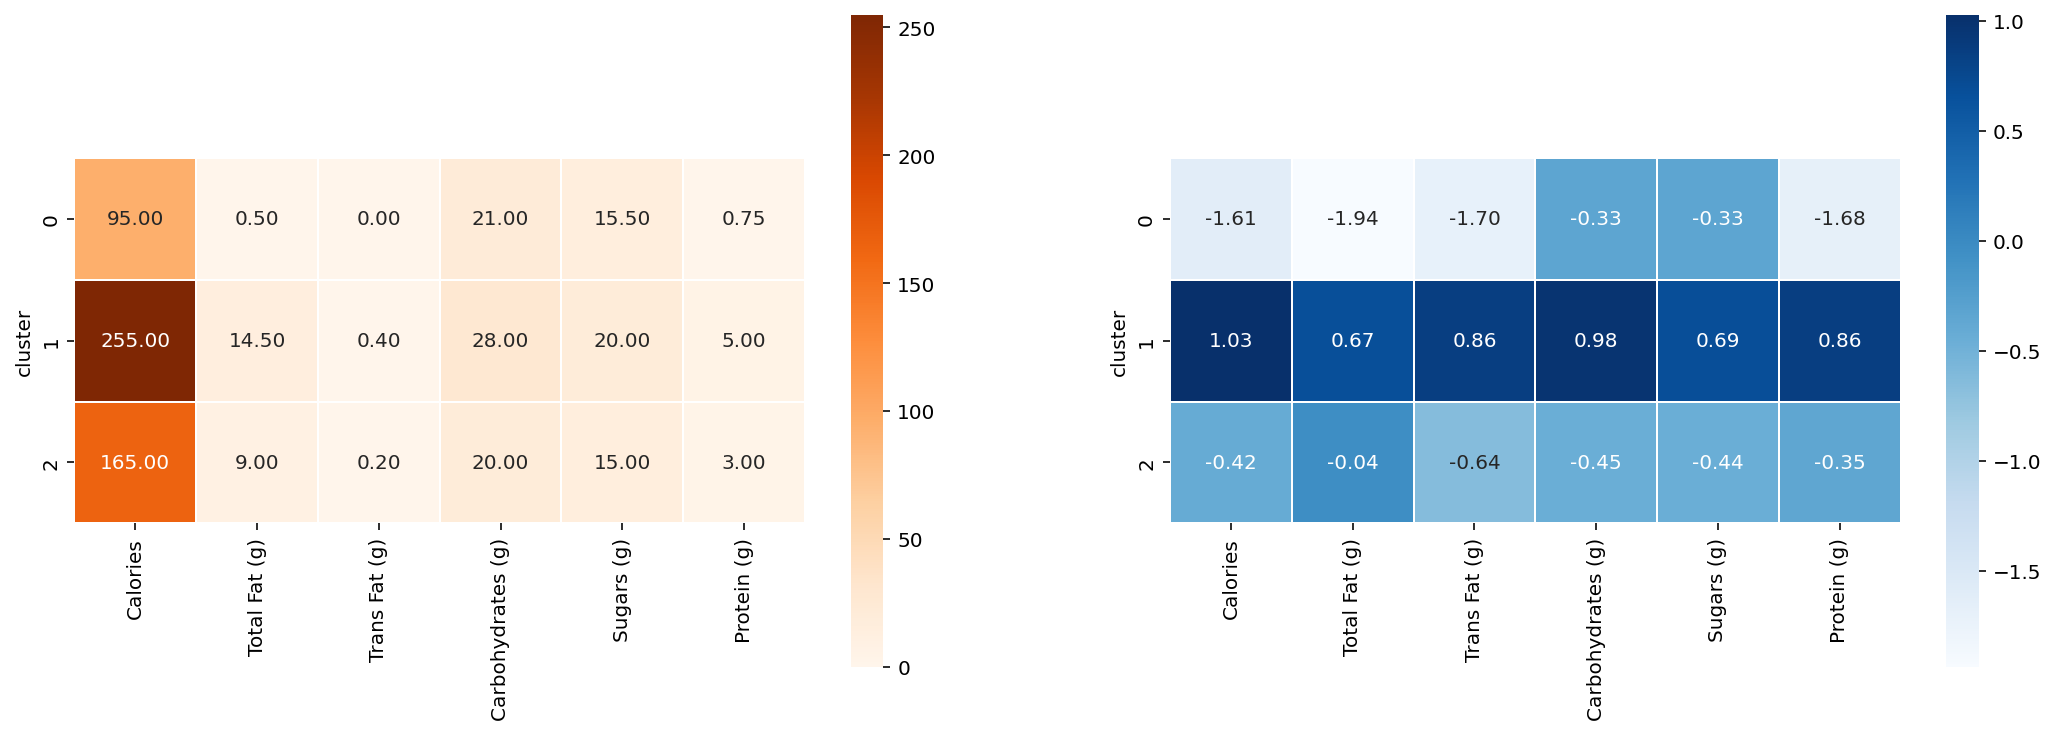

In [44]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster']
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
ax=ax.ravel()
sns.heatmap(df[cols].groupby('cluster').median(), cmap="Oranges", linewidths=1, 
            square=True, annot=True, fmt='.2f',ax=ax[0]);
sns.heatmap(dx[cols].groupby('cluster').median(), cmap="Blues", linewidths=1, 
            square=True, annot=True, fmt='.2f', ax=ax[1]);

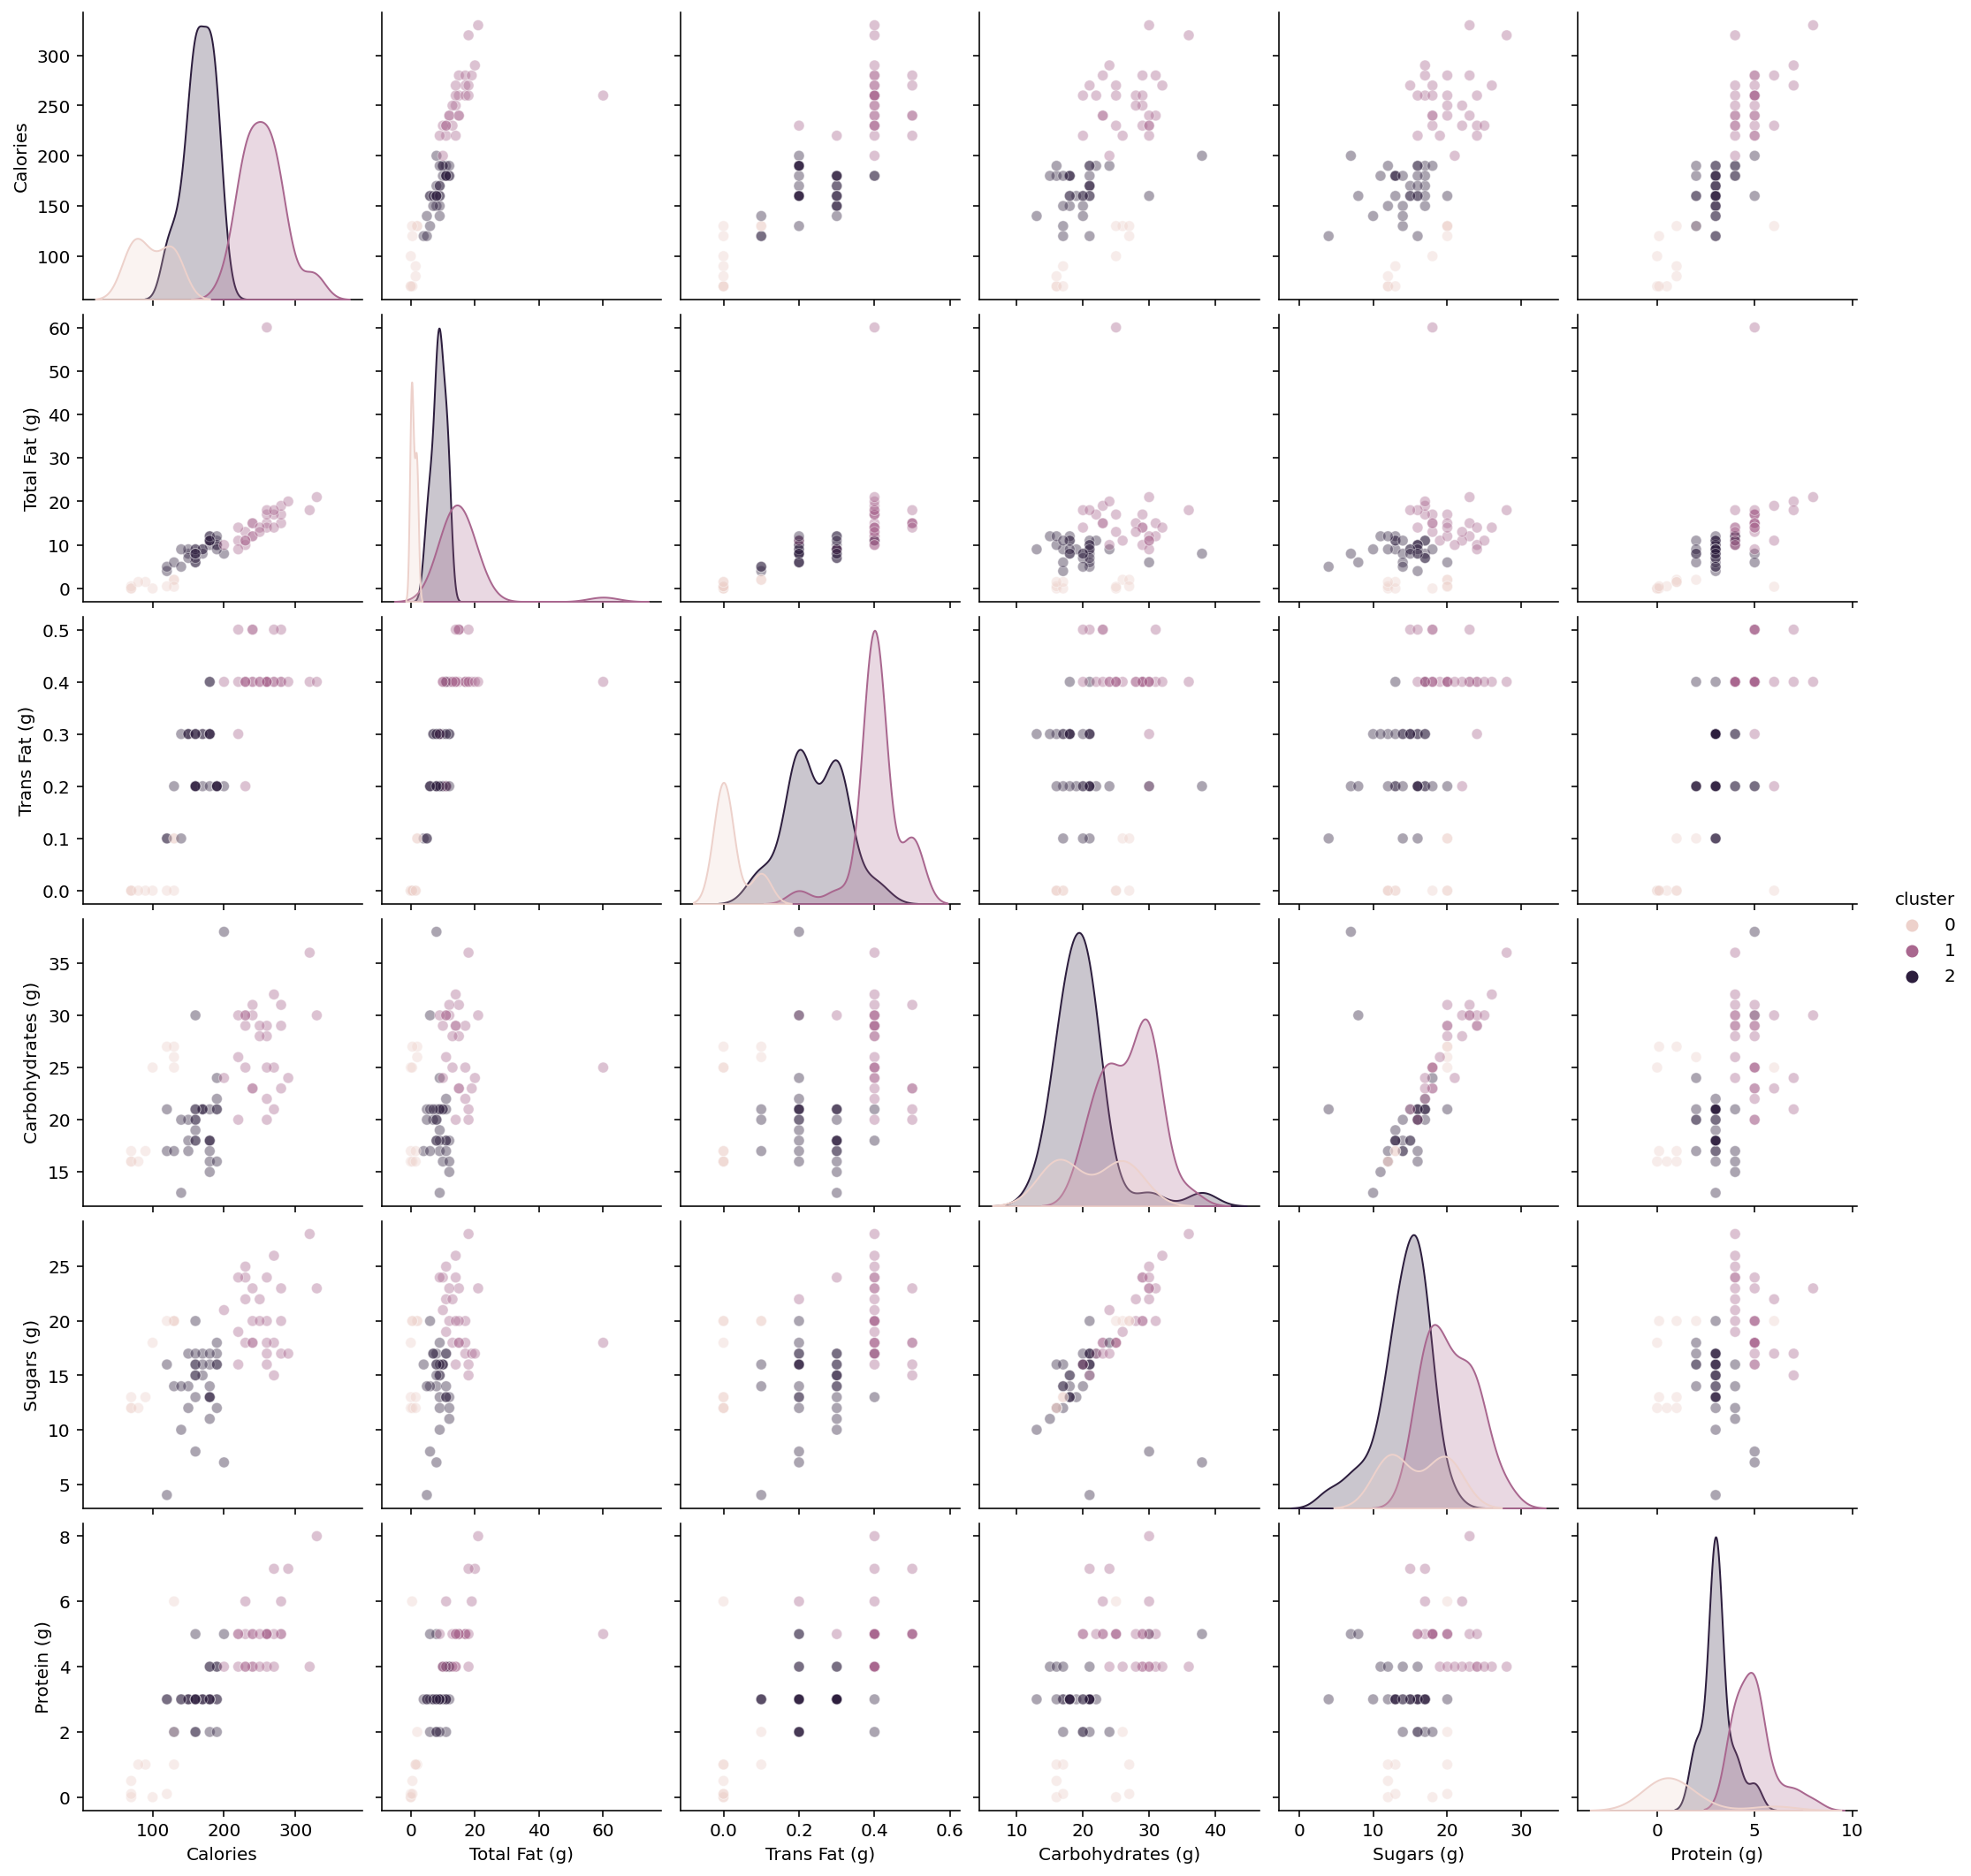

In [45]:
sns.pairplot(df, vars=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'], 
             hue='cluster',
             plot_kws={'alpha': .4});

In [46]:
df.groupby('cluster').head(3).sort_values('cluster')

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,0
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,0
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,1
11,Chocolate,230,13.0,0.4,25,18,5.0,1
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,1
0,Bananas Foster,160,8.0,0.2,20,16,2.0,2
1,Baseball Nut,160,9.0,0.2,19,13,3.0,2
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,2
